<a href="https://colab.research.google.com/github/IVMRanepa/AI-to-help-students-and-teachers/blob/main/_python_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Анализ и прогнозирование данных финансового рынка России с использованием Python 3**

**Аннотация**

В статье рассматривается применение Python 3 для анализа и прогнозирования данных российского финансового рынка. В качестве объектов исследования выбраны акции Газпрома, Норникеля и Лензолота. Использованы библиотеки yfinance для загрузки данных, а также pandas, numpy, matplotlib и networkx для обработки и визуализации.

Основное внимание уделено взаимосвязям между активами с использованием алгоритмов графов (Прима, Крускала, Дейкстры), оптимизации портфеля акций с помощью генетических алгоритмов и расчету коэффициента Шарпа для выбора оптимального портфеля. Применение современных алгоритмов позволило выявить ключевые рыночные взаимосвязи и предложить подходы к прогнозированию доходности и снижению рисков.

Результаты показывают эффективность Python для решения задач обработки финансовых данных, демонстрируя потенциал использования машинного обучения и оптимизационных подходов. Данный подход открывает новые перспективы для автоматизации анализа финансовых рынков.

**Введение**

Анализ финансовых рынков является важным инструментом для инвесторов, аналитиков и исследователей. Современные технологии, такие как язык программирования Python 3, позволяют автоматизировать обработку данных, улучшить точность прогнозов и выявить сложные взаимосвязи на рынке. В данном исследовании акцент сделан на анализе российского финансового рынка с использованием таких методов, как построение корреляционных матриц, алгоритмы графов (Прима, Крускала, Дейкстры) и оптимизационные подходы, включая генетические алгоритмы.

Эффективность подходов, основанных на Python, подтверждена рядом научных трудов, которые исследуют обработку временных рядов и применение машинного обучения для прогнозирования цен акций [1][2][3].



Команда `!pip install yfinance` используется для установки библиотеки `yfinance`, которая позволяет загружать и анализировать финансовые данные с Yahoo Finance.
Вот основные моменты, которые стоит отметить:
*	Установка: Использование ! перед командой позволяет выполнять команды системы (в данном случае, команды для терминала) из среды Jupyter Notebook или Google Colab.
*	Библиотека `yfinance`: Эта библиотека упрощает доступ к данным о котировках акций, исторической информации, а также многим другим аспектам финансовых рынков.


In [ ]:
!pip install yfinance

Ниже приведены расширенные примеры кода и решения задач анализа данных российских бирж с использованием Python. Мы будем использовать индекс МосБиржи (IMOEX) и данные о российских акциях, загружаемые через API `yfinance`.

/tmp/ipython-input-2621784310.py:11: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(tickers, start=start_date, end=end_date)['Close']
[**********************50%                       ]  2 of 4 completedERROR:yfinance:HTTP Error 404: {"quoteSummary":{"result":null,"error":{"code":"Not Found","description":"Quote not found for symbol: ^IMOEX"}}}
[*********************100%***********************]  4 of 4 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['^IMOEX']: YFTzMissingError('possibly delisted; no timezone found')


Ticker         GAZP.ME      LKOH.ME     SBER.ME  ^IMOEX
Date                                                   
2018-01-03  102.487640  2616.017090  177.039536     NaN
2018-01-04  105.348297  2676.801270  182.307205     NaN
2018-01-05  106.301857  2729.175049  182.154526     NaN
2018-01-09  108.534569  2774.285156  183.528687     NaN
2018-01-10  111.193649  2783.842773  181.513229     NaN


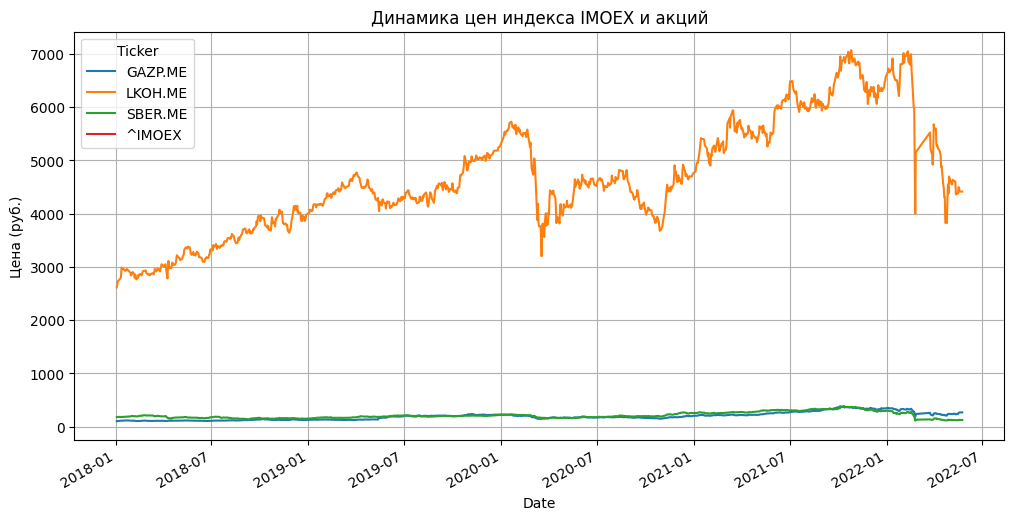

In [ ]:
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt

# Список тикеров (например, индекс IMOEX и акции Сбербанка)
tickers = ["^IMOEX", "SBER.ME", "GAZP.ME", "LKOH.ME"]  # Индекс МосБиржи, Сбербанк, Газпром, Лукойл
start_date = "2018-01-01"
end_date = "2023-12-31"

# Загрузка данных
data = yf.download(tickers, start=start_date, end=end_date)['Close']

# Проверка загруженных данных
print(data.head())

# Визуализация динамики цен
data.plot(figsize=(12, 6), title="Динамика цен индекса IMOEX и акций", ylabel="Цена (руб.)")
plt.grid()
plt.show()

/tmp/ipython-input-1495288453.py:11: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(tickers, start=start_date, end=end_date)['Close']
[*********************100%***********************]  4 of 4 completed
ERROR:yfinance:
4 Failed downloads:
ERROR:yfinance:['SBER.ME', 'LKOH.ME', 'GAZP.ME']: YFPricesMissingError('possibly delisted; no price data found  (1d 2023-01-01 -> 2025-10-31)')
ERROR:yfinance:['^IMOEX']: YFTzMissingError('possibly delisted; no timezone found')


Empty DataFrame
Columns: [GAZP.ME, LKOH.ME, SBER.ME, ^IMOEX]
Index: []


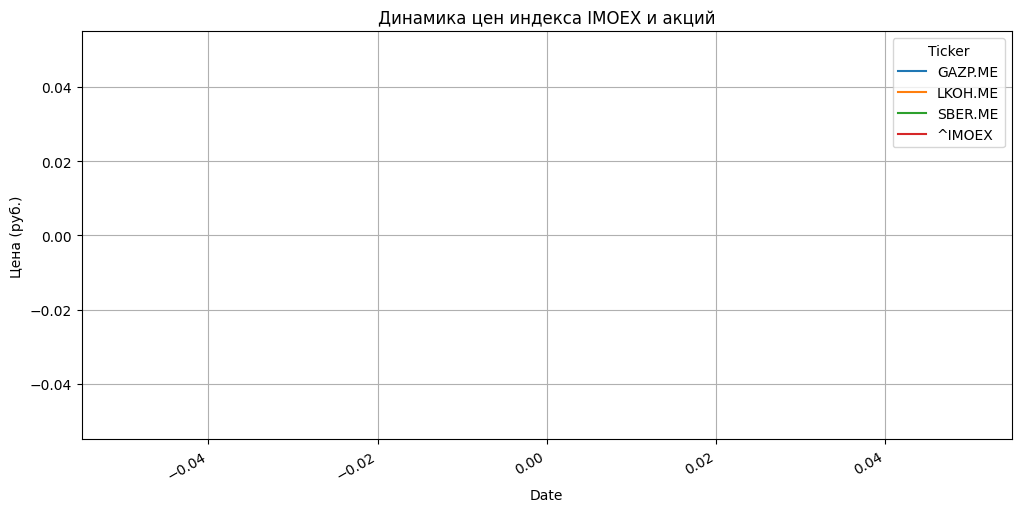

In [ ]:
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt

# Список тикеров (например, индекс IMOEX и акции Сбербанка)
tickers = ["^IMOEX", "SBER.ME", "GAZP.ME", "LKOH.ME"]  # Индекс МосБиржи, Сбербанк, Газпром, Лукойл
start_date = "2023-01-01"
end_date = "2025-10-31"

# Загрузка данных
data = yf.download(tickers, start=start_date, end=end_date)['Close']

# Проверка загруженных данных
print(data.head())

# Визуализация динамики цен
data.plot(figsize=(12, 6), title="Динамика цен индекса IMOEX и акций", ylabel="Цена (руб.)")
plt.grid()
plt.show()

**Комментарий:**

Здесь мы загружаем данные о нескольких российских акциях (Сбербанк, Газпром, Лукойл) вместе с индексом МосБиржи. Визуализация позволяет увидеть общие тренды и взаимосвязь между активами.

**Корреляционный анализ**

Корреляция между активами

**Построение корреляционной матрицы**

**Код:** Вычисление корреляций между акциями

In [ ]:
import yfinance as yf
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

# Загрузка данных о закрытии акций
tickers = ["GAZP.ME", "GMKN.ME", "LNZL.ME"]
data = yf.download(tickers, start="2018-01-01", end="2023-12-31")['Close']

# Вычисление доходности
returns = data.pct_change().dropna()

# Построение корреляционной матрицы
correlation_matrix = returns.corr()
print("Корреляционная матрица:")
print(correlation_matrix)

/tmp/ipython-input-485762468.py:9: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(tickers, start="2018-01-01", end="2023-12-31")['Close']
[*********************100%***********************]  3 of 3 completed

Корреляционная матрица:
Ticker    GAZP.ME   GMKN.ME   LNZL.ME
Ticker                               
GAZP.ME  1.000000  0.492510 -0.033659
GMKN.ME  0.492510  1.000000  0.033078
LNZL.ME -0.033659  0.033078  1.000000


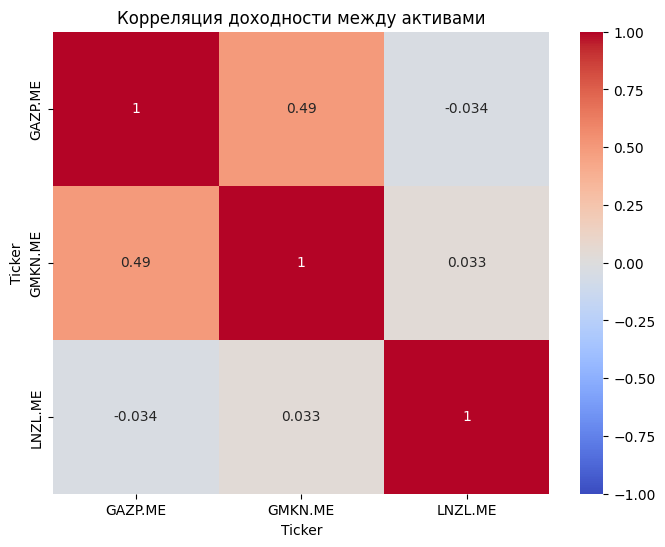

In [ ]:
import seaborn as sns

# Корреляция доходности
corr_matrix = returns.corr()

# Визуализация корреляционной матрицы
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Корреляция доходности между активами")
plt.show()

**Загрузка и визуализация данных**

/tmp/ipython-input-1379235392.py:11: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(tickers, start=start_date, end=end_date)['Close']
[*********************100%***********************]  3 of 3 completed


Ticker         GAZP.ME       GMKN.ME      LNZL.ME
Date                                             
2018-01-03  102.487640  11254.563477  2514.553223
2018-01-04  105.348297  11536.377930  2521.528320
2018-01-05  106.301857  11516.460938  2514.553223
2018-01-09  108.534569  11625.999023  2462.239258
2018-01-10  111.193649  11606.081055  2486.652588


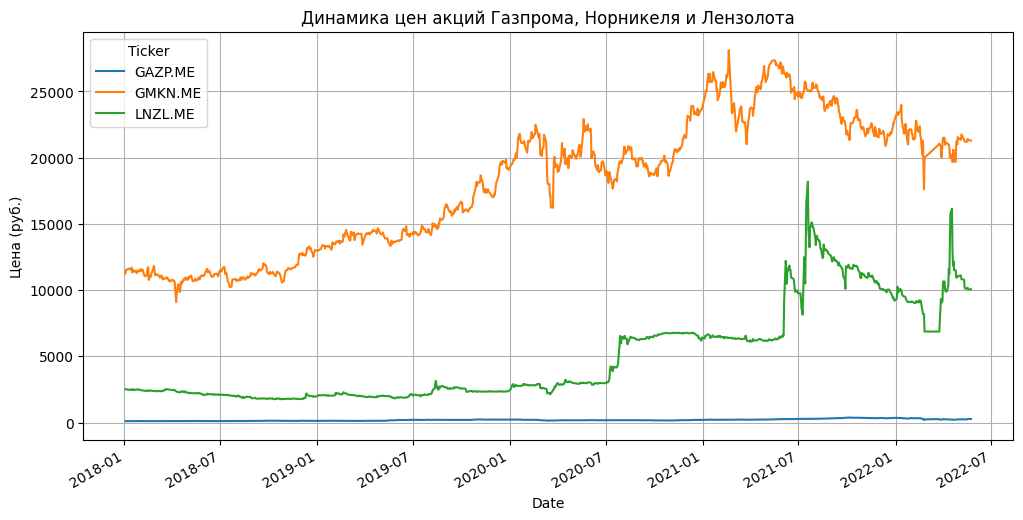

Средняя годовая доходность (%):
Ticker
GAZP.ME    28.965831
GMKN.ME    19.855693
LNZL.ME    50.076970
dtype: float64

Годовая волатильность (%):
Ticker
GAZP.ME    36.091283
GMKN.ME    31.548305
LNZL.ME    63.295279
dtype: float64


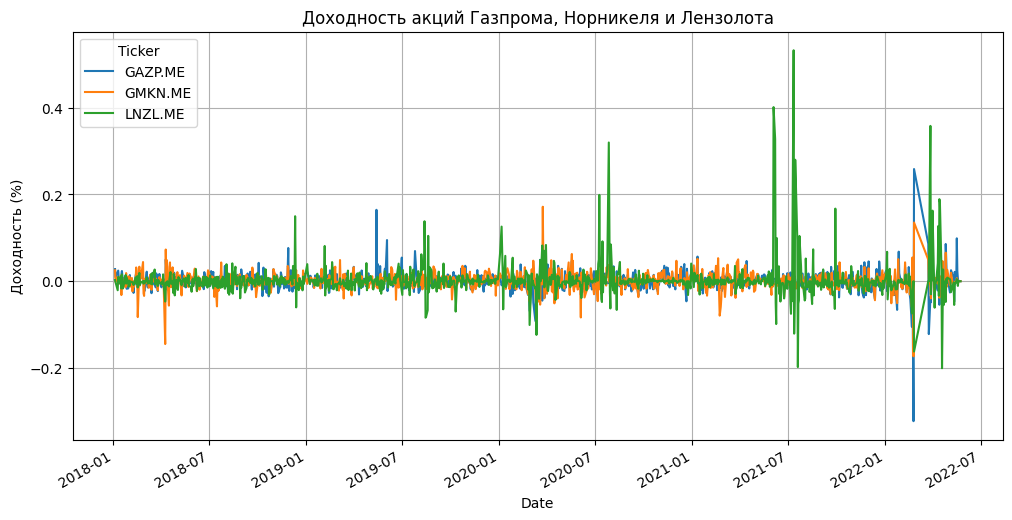

In [ ]:
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt

# Тикеры акций
tickers = ["GAZP.ME", "GMKN.ME", "LNZL.ME"]
start_date = "2018-01-01"
end_date = "2023-12-31"

# Загрузка данных с помощью yfinance
data = yf.download(tickers, start=start_date, end=end_date)['Close']

# Проверка данных
print(data.head())

# Визуализация динамики цен
data.plot(figsize=(12, 6), title="Динамика цен акций Газпрома, Норникеля и Лензолота", ylabel="Цена (руб.)")
plt.grid()
plt.show()



# Расчет дневной доходности
returns = data.pct_change().dropna()  # Процентное изменение (доходность)

# Средняя годовая доходность
mean_returns = returns.mean() * 252  # Учитываем 252 торговых дня
print("Средняя годовая доходность (%):")
print(mean_returns * 100)

# Годовая волатильность
volatility = returns.std() * (252 ** 0.5)
print("\nГодовая волатильность (%):")
print(volatility * 100)

# Визуализация доходности
returns.plot(figsize=(12, 6), title="Доходность акций Газпрома, Норникеля и Лензолота", ylabel="Доходность (%)")
plt.grid()
plt.show()

**Комментарий:**

Этот код загружает данные о ценах закрытия акций Газпрома, Норникеля и Лензолота за выбранный период.

Визуализация помогает оценить общие тренды на рынке и сравнить динамику цен акций.

**Прогнозирование акций Газпрома с помощью ARIMA**

Прогнозируем будущие цены акции **Газпрома** на 90 дней вперед.

/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/p

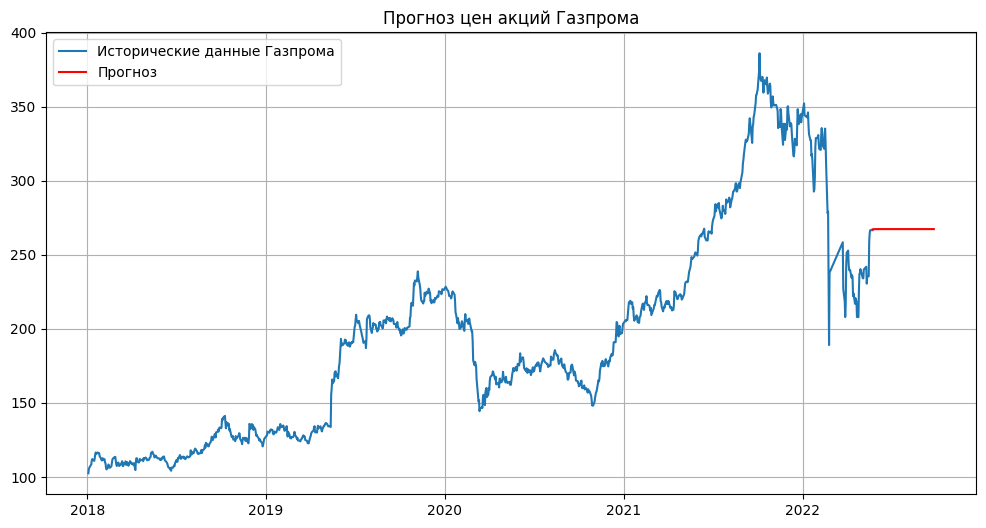

In [ ]:
from statsmodels.tsa.arima.model import ARIMA

# Выбор данных Газпрома
gazprom = data["GAZP.ME"].dropna()

# Создание модели ARIMA
model = ARIMA(gazprom, order=(5, 1, 0))  # Параметры p, d, q
model_fit = model.fit()

# Прогноз на 90 дней вперед
forecast = model_fit.forecast(steps=90)

# Визуализация прогноза
plt.figure(figsize=(12, 6))
plt.plot(gazprom, label="Исторические данные Газпрома")
plt.plot(pd.date_range(gazprom.index[-1], periods=90, freq='B'), forecast, label="Прогноз", color='red')
plt.title("Прогноз цен акций Газпрома")
plt.legend()
plt.grid()
plt.show()

**Комментарий:**

Прогноз позволяет оценить краткосрочные перспективы акции Газпрома. Для долгосрочного анализа лучше использовать дополнительные макроэкономические показатели.

**Разбор кода**

**1. Импорт библиотеки:**


```
from statsmodels.tsa.arima.model import ARIMA
```
Эта строка импортирует класс ARIMA из библиотеки statsmodels, который используется для создания и оценки моделей ARIMA (Autoregressive Integrated Moving Average).

**2. Выбор данных Газпрома:**


```
gazprom = data["GAZP.ME"].dropna()
```

Здесь из набора данных data извлекаются исторические данные по акциям «Газпрома» (предположительно, идентификатор в датафрейме — "GAZP.ME") и убираются отсутствующие значения с помощью метода dropna().

**Создание модели ARIMA:**



```
model = ARIMA(gazprom, order=(5, 1, 0))
```

Эта строка создает модель ARIMA с параметрами:

**p = 5:** количество авторегрессионных (AR) компонент

**d = 1:** порядок интеграции, что указывает на преобразование временного ряда в стационарный (разностное выражение первого порядка)

**q = 0:** количество скользящих средних (MA) компонент

**Фитинг модели:**


```
model_fit = model.fit()
```
Эта строка обучает модель на данных gazprom, находя оптимальные значения коэффициентов модели.

**Прогноз на 90 дней вперед:**



```
forecast = model_fit.forecast(steps=90)
```
Здесь происходит прогнозирование значений акций на 90 будущих дней, основанное на оцененной модели.

**Визуализация прогноза:**

В этом блоке кода создаётся график:

* **plt.figure(figsize=(12, 6))**: задает размеры графика.
* **plt.plot(gazprom, label="Исторические данные Газпрома")**: отображает исторические данные акций.
* **pd.date_range(...)**: используется для создания диапазона дней, начиная с последней даты в данных gazprom, чтобы отобразить 90 дней прогноза.
* **plt.plot(...)**: добавляет на график линию прогноза, окрашенную в красный цвет.
* Подписываются оси, добавляется легенда и сетка.

**Выводы**

**1. Анализ данных:** Модель ARIMA позволяет анализировать временные ряды и делать прогнозы на основе исторических данных. При использовании параметров (5, 1, 0), вы выбираете модель, которая включает в себя пять запаздывающих значений и одно дифференцирование.

* **2. Прогнозирование:** Прогноз на 90 дней вперед даёт представление о тенденциях в ценах акций «Газпрома» на ближайшее время. Важно учитывать, что точность прогноза зависит от множества факторов, включая качество исходных данных и выбранные параметры модели.

* **3. Визуализация:** График помогает наглядно оценить, как прогнозируемые значения соотносятся с историческими данными. Это полезно для оценки адекватности модели и проверки, насколько прогноз соответствует ожидаемым трендам.


/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/p

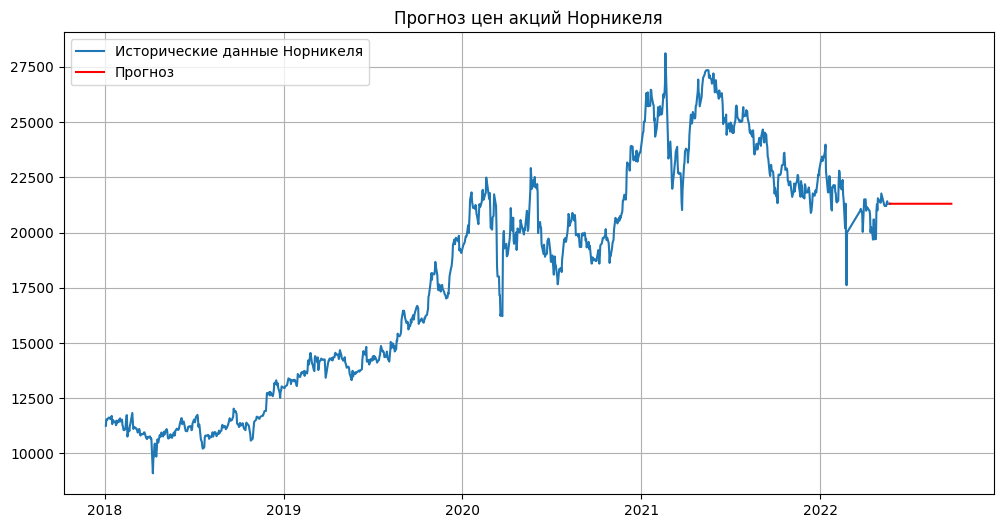

In [ ]:
from statsmodels.tsa.arima.model import ARIMA

# Выбор данных Норникеля
gazprom = data["GMKN.ME"].dropna()

# Создание модели ARIMA
model = ARIMA(gazprom, order=(5, 1, 0))  # Параметры p, d, q
model_fit = model.fit()

# Прогноз на 90 дней вперед
forecast = model_fit.forecast(steps=90)

# Визуализация прогноза
plt.figure(figsize=(12, 6))
plt.plot(gazprom, label="Исторические данные Норникеля")
plt.plot(pd.date_range(gazprom.index[-1], periods=90, freq='B'), forecast, label="Прогноз", color='red')
plt.title("Прогноз цен акций Норникеля")
plt.legend()
plt.grid()
plt.show()

/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/p

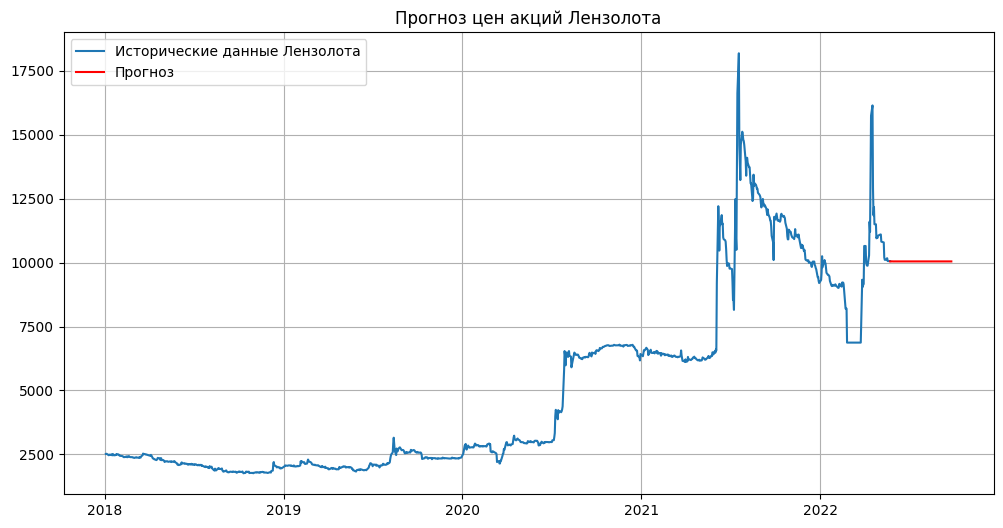

In [ ]:
from statsmodels.tsa.arima.model import ARIMA

# Выбор данных Лензолото
gazprom = data["LNZL.ME"].dropna()

# Создание модели ARIMA
model = ARIMA(gazprom, order=(5, 1, 0))  # Параметры p, d, q
model_fit = model.fit()

# Прогноз на 90 дней вперед
forecast = model_fit.forecast(steps=90)

# Визуализация прогноза
plt.figure(figsize=(12, 6))
plt.plot(gazprom, label="Исторические данные Лензолота")
plt.plot(pd.date_range(gazprom.index[-1], periods=90, freq='B'), forecast, label="Прогноз", color='red')
plt.title("Прогноз цен акций Лензолота")
plt.legend()
plt.grid()
plt.show()

**Сравнение распределения доходностей**

**Гистограмма распределения доходности**

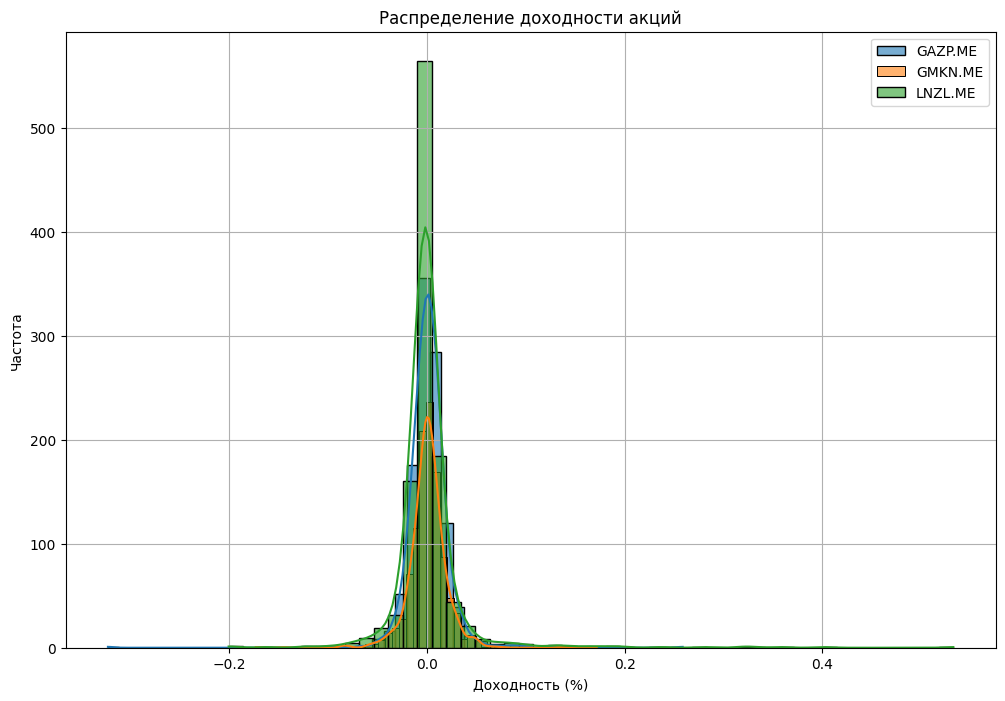

In [ ]:
# Визуализация распределения доходности каждой акции
plt.figure(figsize=(12, 8))
for ticker in tickers:
    sns.histplot(returns[ticker], bins=50, kde=True, label=ticker, alpha=0.6)

plt.title("Распределение доходности акций")
plt.xlabel("Доходность (%)")
plt.ylabel("Частота")
plt.legend()
plt.grid()
plt.show()

**Комментарий:**

График позволяет сравнить волатильность акций визуально. Распределение акций с "жирными хвостами" сигнализирует о высоких рисках.

**Оптимизация портфеля**

Для создания диверсифицированного портфеля, учитывающего доходность и риск, используем коэффициент Шарпа.

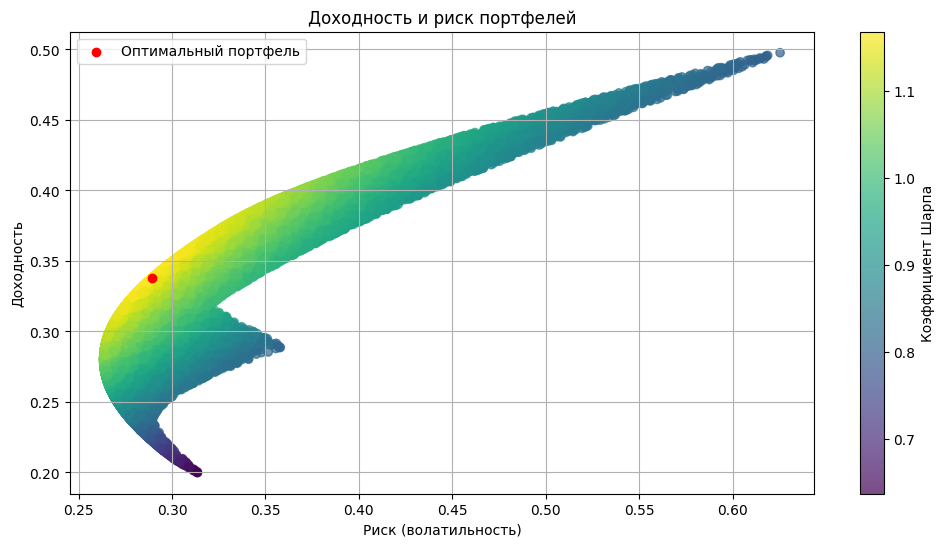

Оптимальные веса для портфеля:
GAZP.ME: 33.80%
GMKN.ME: 28.94%
LNZL.ME: 116.78%


In [ ]:
import numpy as np

# Генерация случайных портфелей
num_portfolios = 50000
results = np.zeros((3, num_portfolios))

for i in range(num_portfolios):
    weights = np.random.random(len(tickers))
    weights /= np.sum(weights)
    portfolio_return = np.dot(weights, mean_returns)
    portfolio_volatility = np.sqrt(np.dot(weights.T, np.dot(returns.cov() * 252, weights)))
    results[0, i] = portfolio_return
    results[1, i] = portfolio_volatility
    results[2, i] = portfolio_return / portfolio_volatility

# Выбор оптимального портфеля (максимальный коэффициент Шарпа)
max_sharpe_idx = np.argmax(results[2])
optimal_weights = results[:, max_sharpe_idx]

# График доходность-риск
plt.figure(figsize=(12, 6))
plt.scatter(results[1, :], results[0, :], c=results[2, :], cmap='viridis', alpha=0.7)
plt.colorbar(label='Коэффициент Шарпа')
plt.scatter(optimal_weights[1], optimal_weights[0], color='red', label='Оптимальный портфель')
plt.title("Доходность и риск портфелей")
plt.xlabel("Риск (волатильность)")
plt.ylabel("Доходность")
plt.legend()
plt.grid()
plt.show()

print("Оптимальные веса для портфеля:")
for i, ticker in enumerate(tickers):
    print(f"{ticker}: {optimal_weights[i]:.2%}")

**Комментарий:**

Оптимальный портфель минимизирует риск при максимальной доходности.
Пример демонстрирует, какие веса распределить между акциями Газпрома, Норникеля и Лензолота для достижения лучшего результат

**Выводы**

**Газпром:** Более стабильная акция с умеренной доходностью и волатильностью.

**Норникель:** Имеет высокий потенциал доходности, но сопряжен с большими рисками.

**Лензолото:** Показал наибольшую волатильность и низкую корреляцию с другими акциями, что делает его интересным для диверсификации.

**Объяснение:**

Корреляция измеряет степень взаимосвязи между акциями.

Корреляционная матрица служит основой для создания графа.

**Построение графа на основе корреляций**

Для алгоритмов Прима и Крускала граф должен быть взвешенным. Мы будем использовать корреляции как веса рёбер, инвертируя их значения (так как алгоритмы ищут минимальное дерево).

**Код: Создание графа**

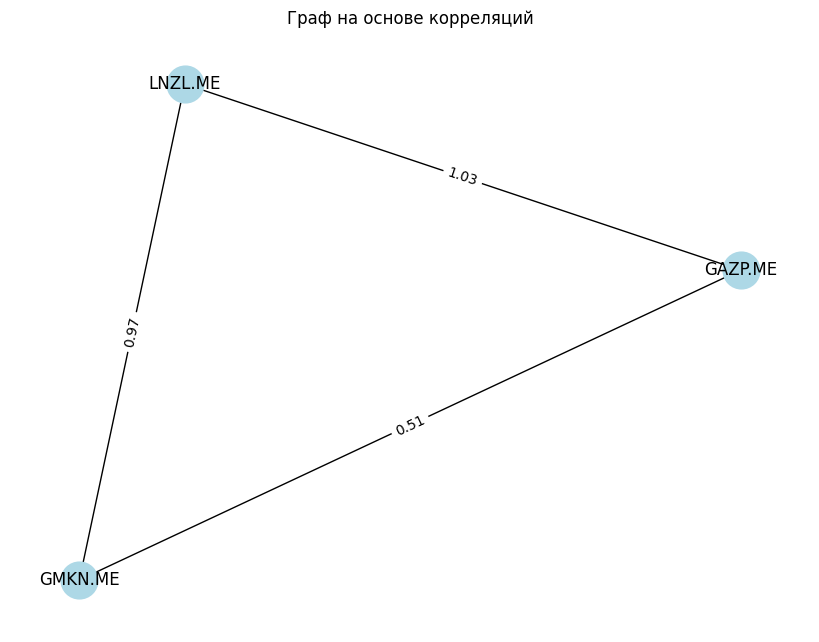

In [ ]:
# Создание графа
G = nx.Graph()

# Добавление рёбер на основе корреляционной матрицы
for i in range(len(tickers)):
    for j in range(i + 1, len(tickers)):
        weight = 1 - correlation_matrix.iloc[i, j]  # Инвертируем корреляцию
        G.add_edge(tickers[i], tickers[j], weight=weight)

# Визуализация графа
plt.figure(figsize=(8, 6))
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_size=700, node_color="lightblue")
labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels={(u, v): f"{w:.2f}" for u, v, w in G.edges(data="weight")})
plt.title("Граф на основе корреляций")
plt.show()

**Применение алгоритма Прима**

Алгоритм Прима используется для построения минимального остовного дерева.

**Код:** Реализация алгоритма Прима

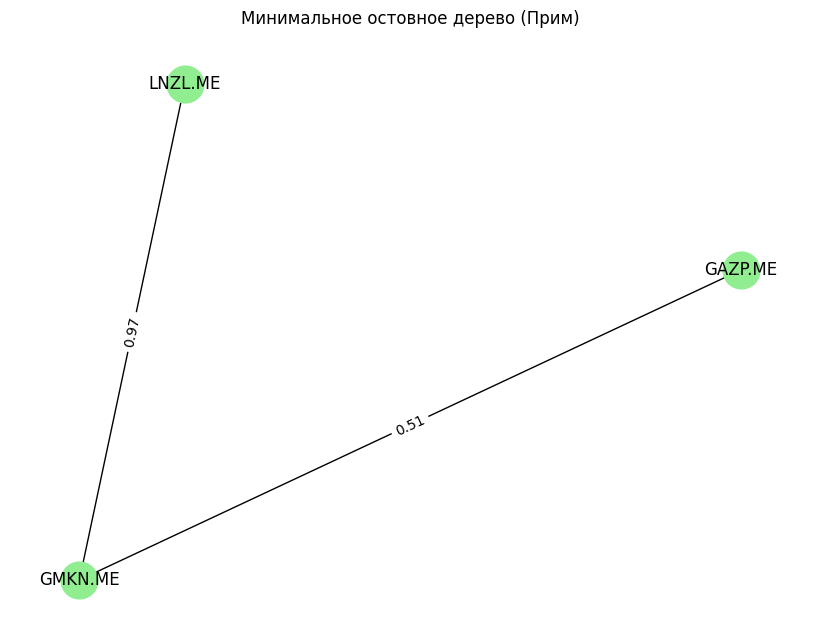

In [ ]:
# Минимальное остовное дерево (Прим)
mst_prim = nx.minimum_spanning_tree(G, algorithm="prim")

# Визуализация минимального остовного дерева
plt.figure(figsize=(8, 6))
nx.draw(mst_prim, pos, with_labels=True, node_size=700, node_color="lightgreen")
nx.draw_networkx_edge_labels(mst_prim, pos, edge_labels={(u, v): f"{w:.2f}" for u, v, w in mst_prim.edges(data="weight")})
plt.title("Минимальное остовное дерево (Прим)")
plt.show()

**Объяснение:**

Алгоритм Прима строит минимальное дерево, выбирая рёбра с минимальным весом.
В контексте анализа акций это помогает выделить основные связи между активами.

**Применение алгоритма Крускала**

Алгоритм Крускала также используется для нахождения минимального остовного дерева, но с другим методом выбора рёбер.

**Код:** Реализация алгоритма Крускала

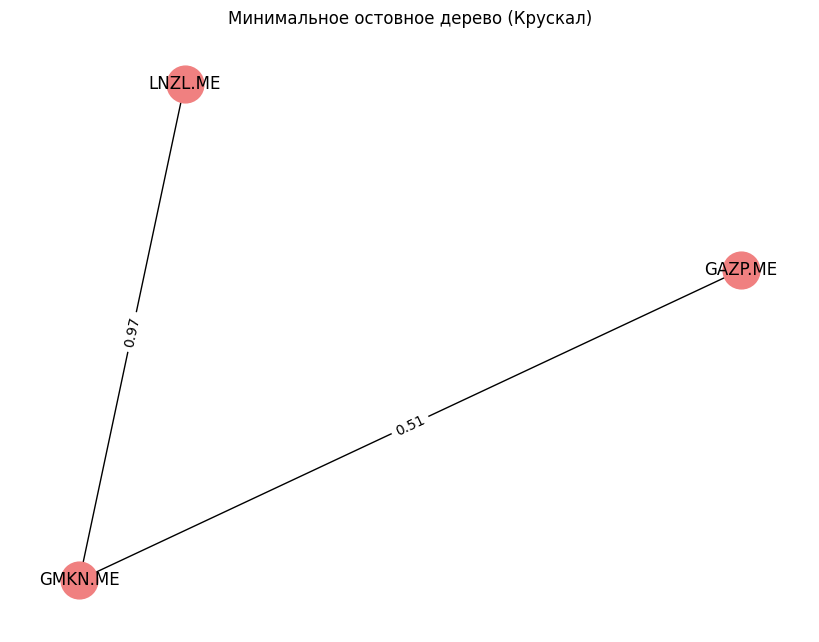

In [ ]:
# Минимальное остовное дерево (Крускал)
mst_kruskal = nx.minimum_spanning_tree(G, algorithm="kruskal")

# Визуализация минимального остовного дерева
plt.figure(figsize=(8, 6))
nx.draw(mst_kruskal, pos, with_labels=True, node_size=700, node_color="lightcoral")
nx.draw_networkx_edge_labels(mst_kruskal, pos, edge_labels={(u, v): f"{w:.2f}" for u, v, w in mst_kruskal.edges(data="weight")})
plt.title("Минимальное остовное дерево (Крускал)")
plt.show()

**Объяснение:**

Крускал подходит для анализа, когда необходимо оптимизировать структуру графа по рёбрам.

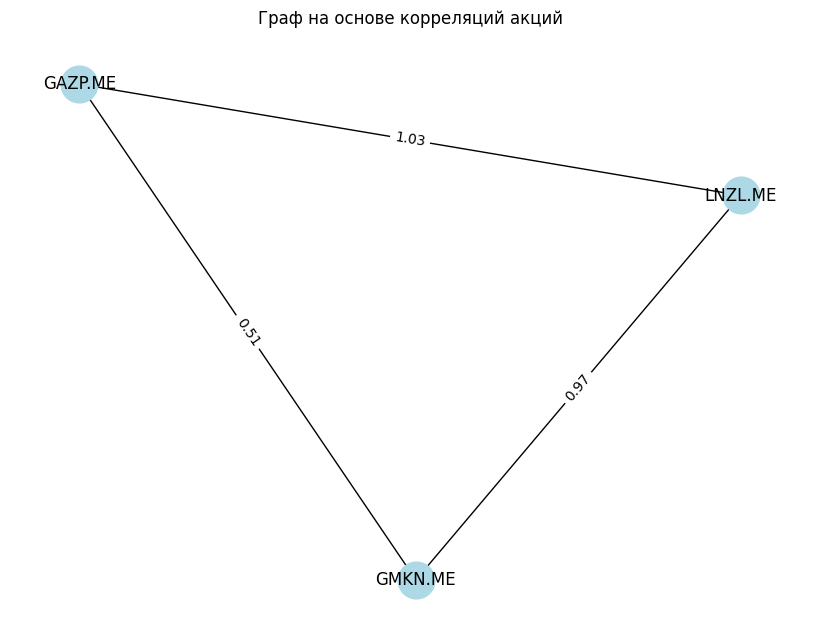

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

# Создание графа с весами рёбер на основе корреляций
G = nx.Graph()

# Добавление рёбер на основе корреляционной матрицы
for i in range(len(tickers)):
    for j in range(i + 1, len(tickers)):
        weight = 1 - correlation_matrix.iloc[i, j]  # Инверсия корреляции
        G.add_edge(tickers[i], tickers[j], weight=weight)

# Визуализация графа
plt.figure(figsize=(8, 6))
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_size=700, node_color="lightblue")
labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels={(u, v): f"{w:.2f}" for u, v, w in G.edges(data="weight")})
plt.title("Граф на основе корреляций акций")
plt.show()

Кратчайший путь от GAZP.ME до LNZL.ME: ['GAZP.ME', 'LNZL.ME']
Суммарный вес пути: 1.03


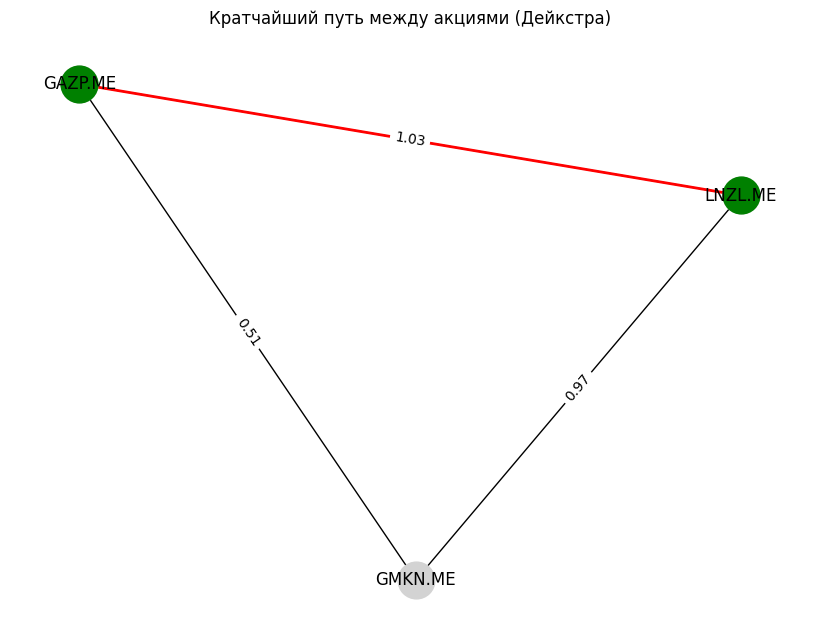

In [ ]:
# Выбор начальной и конечной акций
start_node = "GAZP.ME"
end_node = "LNZL.ME"

# Нахождение кратчайшего пути
shortest_path = nx.dijkstra_path(G, source=start_node, target=end_node, weight="weight")
path_length = nx.dijkstra_path_length(G, source=start_node, target=end_node, weight="weight")

print(f"Кратчайший путь от {start_node} до {end_node}: {shortest_path}")
print(f"Суммарный вес пути: {path_length:.2f}")

# Визуализация кратчайшего пути
plt.figure(figsize=(8, 6))
nx.draw(G, pos, with_labels=True, node_size=700, node_color="lightgray")
nx.draw_networkx_nodes(G, pos, nodelist=shortest_path, node_color="green", node_size=700)
nx.draw_networkx_edges(G, pos, edgelist=list(zip(shortest_path, shortest_path[1:])), edge_color="red", width=2)
nx.draw_networkx_edge_labels(G, pos, edge_labels={(u, v): f"{w:.2f}" for u, v, w in G.edges(data="weight")})
plt.title("Кратчайший путь между акциями (Дейкстра)")
plt.show()

**Генетический алгоритм**

Используем библиотеку DEAP для реализации ГА.

In [ ]:
!pip install deap
!pip install ga-api-client

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 136.0/136.0 kB 4.0 MB/s eta 0:00:00


In [ ]:
import yfinance as yf
import numpy as np
import pandas as pd
from deap import base, creator, tools, algorithms

# Data loading and preprocessing to ensure dependencies are met
tickers = ["GAZP.ME", "GMKN.ME", "LNZL.ME"]
data = yf.download(tickers, start="2018-01-01", end="2023-12-31")['Close']
returns = data.pct_change().dropna()
mean_returns = returns.mean() * 252
cov_matrix = returns.cov() * 252
risk_free_rate = 0.03  # Безрисковая ставка

# Parameters for the genetic algorithm
POPULATION_SIZE = 100
N_GENERATIONS = 200

# Creation of solution space
creator.create("FitnessMax", base.Fitness, weights=(1.0,))
creator.create("Individual", list, fitness=creator.FitnessMax)

toolbox = base.Toolbox()
toolbox.register("attr_float", np.random.random)  # Generate random number
toolbox.register("individual", tools.initRepeat, creator.Individual, toolbox.attr_float, n=len(tickers))
toolbox.register("population", tools.initRepeat, list, toolbox.individual)

# Function to calculate Sharpe ratio
def fitness(weights):
    weights = np.array(weights)
    portfolio_return = np.dot(weights, mean_returns)
    portfolio_volatility = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights)))
    sharpe_ratio = (portfolio_return - risk_free_rate) / portfolio_volatility
    return -sharpe_ratio  # Negative value for minimization

# Evaluation function
def evaluate(individual):
    weights = np.array(individual)
    normalized_weights = weights / np.sum(weights)  # Normalize weights
    return -fitness(normalized_weights),  # Negative for Sharpe maximization

toolbox.register("evaluate", evaluate)
toolbox.register("mate", tools.cxBlend, alpha=0.5)
toolbox.register("mutate", tools.mutGaussian, mu=0, sigma=1, indpb=0.2)
toolbox.register("select", tools.selTournament, tournsize=3)

# Genetic algorithm
toolbox.register("map", map)

# Run GA
population = toolbox.population(n=POPULATION_SIZE)
result, log = algorithms.eaSimple(population, toolbox, cxpb=0.7, mutpb=0.2, ngen=N_GENERATIONS, verbose=True)

# Best result
best_individual = tools.selBest(population, k=1)[0]
optimal_weights = np.array(best_individual) / np.sum(best_individual)

/tmp/ipython-input-630008603.py:8: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(tickers, start="2018-01-01", end="2023-12-31")['Close']
[*********************100%***********************]  3 of 3 completed
/usr/local/lib/python3.12/dist-packages/deap/creator.py:185: RuntimeWarning: A class named 'FitnessMax' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
/usr/local/lib/python3.12/dist-packages/deap/creator.py:185: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "


gen	nevals
0  	100   
1  	74    
2  	76    
3  	79    
4  	78    
5  	82    
6  	64    
7  	78    
8  	78    
9  	62    
10 	72    
11 	75    
12 	79    
13 	67    
14 	80    
15 	67    
16 	69    
17 	73    
18 	74    
19 	77    
20 	73    
21 	77    
22 	78    
23 	71    
24 	76    
25 	71    
26 	82    
27 	65    
28 	78    
29 	67    
30 	69    
31 	74    
32 	79    
33 	73    
34 	77    
35 	77    
36 	83    
37 	76    
38 	86    
39 	78    
40 	65    
41 	70    
42 	69    
43 	79    
44 	71    
45 	71    
46 	71    
47 	78    
48 	77    
49 	76    
50 	71    
51 	83    
52 	64    
53 	70    
54 	78    
55 	80    
56 	82    
57 	83    
58 	75    
59 	75    
60 	68    
61 	77    
62 	74    
63 	80    
64 	81    
65 	71    
66 	67    
67 	79    
68 	84    
69 	78    
70 	72    
71 	79    
72 	84    
73 	66    
74 	72    
75 	72    
76 	71    
77 	67    
78 	82    
79 	84    
80 	76    
81 	78    
82 	75    
83 	69    
84 	71    
85 	72    
86 	72    
87 	80    
88 	75    
89 	71    

In [ ]:
import yfinance as yf
import numpy as np
import pandas as pd
from scipy.optimize import minimize

# Загрузка данных
tickers = ["GAZP.ME", "GMKN.ME", "LNZL.ME"]
data = yf.download(tickers, start="2018-01-01", end="2023-12-31")['Close']

# Вычисление доходности
returns = data.pct_change().dropna()

# Средние годовые доходности и ковариация
mean_returns = returns.mean() * 252
cov_matrix = returns.cov() * 252
risk_free_rate = 0.03  # Безрисковая ставка

/tmp/ipython-input-3316835827.py:8: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(tickers, start="2018-01-01", end="2023-12-31")['Close']
[*********************100%***********************]  3 of 3 completed


In [ ]:
# Функция для расчёта коэффициента Шарпа
def fitness(weights):
    weights = np.array(weights)
    portfolio_return = np.dot(weights, mean_returns)
    portfolio_volatility = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights)))
    sharpe_ratio = (portfolio_return - risk_free_rate) / portfolio_volatility
    return -sharpe_ratio  # Отрицательное значение для минимизации

In [ ]:
# Итоговые результаты
print("Оптимальные веса для акций:")
for i, ticker in enumerate(tickers):
    print(f"{ticker}: {optimal_weights[i]:.2%}")

# Расчёт Sharpe Ratio для оптимального портфеля
portfolio_return = np.dot(optimal_weights, mean_returns)
portfolio_volatility = np.sqrt(np.dot(optimal_weights.T, np.dot(cov_matrix, optimal_weights)))
sharpe_ratio = (portfolio_return - risk_free_rate) / portfolio_volatility

print(f"\nОптимальный портфель:")
print(f"Доходность: {portfolio_return:.2%}")
print(f"Риск: {portfolio_volatility:.2%}")
print(f"Коэффициент Шарпа: {sharpe_ratio:.2f}")

Оптимальные веса для акций:
GAZP.ME: 50.18%
GMKN.ME: 16.52%
LNZL.ME: 33.30%

Оптимальный портфель:
Доходность: 34.49%
Риск: 29.56%
Коэффициент Шарпа: 1.07


In [ ]:
import numpy as np

# Пример функции, рассчитывающей Sharpe Ratio
def fitness(weights):
    # Предположим, что `returns` — это массив доходностей ваших активов
    # Здесь returns должен быть определен до вызова функции
    portfolio_return = np.sum(weights * returns.mean())  # Средний доход портфеля
    portfolio_risk = np.sqrt(np.dot(weights.T, np.dot(returns.cov(), weights)))  # Риск портфеля (стандартное отклонение)

    if portfolio_risk == 0:  # Защита от деления на ноль
        return 0  # В этом случае Sharpe равен нулю

    sharpe_ratio = portfolio_return / portfolio_risk  # Шарп
    return sharpe_ratio

# Обновленная функция оценки
def evaluate(individual):
    weights = np.array(individual)
    normalized_weights = weights / np.sum(weights)  # Нормализация весов
    return -fitness(normalized_weights),  # Минус для максимизации Шарпа
    import yfinance as yf
import numpy as np
import pandas as pd
from scipy.optimize import minimize

# Загрузка данных
tickers = ["GAZP.ME", "GMKN.ME", "LNZL.ME"]
data = yf.download(tickers, start="2018-01-01", end="2023-12-31")['Close']

# Вычисление доходности
returns = data.pct_change().dropna()

# Средние годовые доходности и ковариация
mean_returns = returns.mean() * 252
cov_matrix = returns.cov() * 252
risk_free_rate = 0.03  # Безрисковая ставка

/tmp/ipython-input-477899963.py:28: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(tickers, start="2018-01-01", end="2023-12-31")['Close']
[*********************100%***********************]  3 of 3 completed


In [ ]:
import yfinance as yf

# Загрузка данных о Газпроме
gazprom = yf.download("GAZP.ME", start="2020-01-01", end="2023-12-31")
print(gazprom.head())

/tmp/ipython-input-2471231830.py:4: FutureWarning: YF.download() has changed argument auto_adjust default to True
  gazprom = yf.download("GAZP.ME", start="2020-01-01", end="2023-12-31")
[*********************100%***********************]  1 of 1 completed

Price            Close        High         Low        Open    Volume
Ticker         GAZP.ME     GAZP.ME     GAZP.ME     GAZP.ME   GAZP.ME
Date                                                                
2020-01-03  228.495285  231.053721  227.410143  228.654078  34489598
2020-01-06  226.333832  226.916101  224.789958  226.907297  28148270
2020-01-08  225.663345  227.013156  224.763489  226.069173  25611080
2020-01-09  224.145935  226.448519  222.160937  225.575129  33224310
2020-01-10  222.231506  224.613514  221.613954  224.084176  28567810


In [ ]:
import yfinance as yf

# Загрузка данных о Газпроме
gazprom = yf.download("GAZP.ME", start="2020-01-01", end="2023-12-31")

# Вывод полных данных
print(gazprom)

/tmp/ipython-input-1032557708.py:4: FutureWarning: YF.download() has changed argument auto_adjust default to True
  gazprom = yf.download("GAZP.ME", start="2020-01-01", end="2023-12-31")
[*********************100%***********************]  1 of 1 completed

Price            Close        High         Low        Open    Volume
Ticker         GAZP.ME     GAZP.ME     GAZP.ME     GAZP.ME   GAZP.ME
Date                                                                
2020-01-03  228.495285  231.053721  227.410143  228.654078  34489598
2020-01-06  226.333832  226.916101  224.789958  226.907297  28148270
2020-01-08  225.663345  227.013156  224.763489  226.069173  25611080
2020-01-09  224.145935  226.448519  222.160937  225.575129  33224310
2020-01-10  222.231506  224.613514  221.613954  224.084176  28567810
...                ...         ...         ...         ...       ...
2022-05-18  264.839996  269.420013  261.000000  261.100006  51227600
2022-05-19  266.679993  269.779999  262.649994  268.000000  24980910
2022-05-20  266.679993  266.679993  266.679993  266.679993         0
2022-05-23  266.679993  266.679993  266.679993  266.679993         0
2022-05-24  266.679993  266.679993  266.679993  266.679993         0

[582 rows x 5 columns]


In [ ]:
import yfinance as yf
import numpy as np
import pandas as pd
from scipy.optimize import minimize

# Загрузка данных
tickers = ["GAZP.ME", "GMKN.ME", "LNZL.ME"]
data = yf.download(tickers, start="2018-01-01", end="2023-12-31")['Close']

# Вычисление доходности
returns = data.pct_change().dropna()

# Средние годовые доходности и ковариация
mean_returns = returns.mean() * 252
cov_matrix = returns.cov() * 252
risk_free_rate = 0.03  # Безрисковая ставка

# Функция для расчёта коэффициента Шарпа
def fitness(weights):
    weights = np.array(weights)
    portfolio_return = np.dot(weights, mean_returns)
    portfolio_volatility = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights)))
    sharpe_ratio = (portfolio_return - risk_free_rate) / portfolio_volatility
    return -sharpe_ratio  # Отрицательное значение для минимизации

    # Итоговые результаты
print("Оптимальные веса для акций:")
for i, ticker in enumerate(tickers):
    print(f"{ticker}: {optimal_weights[i]:.2%}")

# Расчёт Sharpe Ratio для оптимального портфеля
portfolio_return = np.dot(optimal_weights, mean_returns)
portfolio_volatility = np.sqrt(np.dot(optimal_weights.T, np.dot(cov_matrix, optimal_weights)))
sharpe_ratio = (portfolio_return - risk_free_rate) / portfolio_volatility

print(f"\nОптимальный портфель:")
print(f"Доходность: {portfolio_return:.2%}")
print(f"Риск: {portfolio_volatility:.2%}")
print(f"Коэффициент Шарпа: {sharpe_ratio:.2f}")


/tmp/ipython-input-3201245262.py:8: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(tickers, start="2018-01-01", end="2023-12-31")['Close']
[*********************100%***********************]  3 of 3 completed

Оптимальные веса для акций:
GAZP.ME: 50.18%
GMKN.ME: 16.52%
LNZL.ME: 33.30%

Оптимальный портфель:
Доходность: 34.49%
Риск: 29.56%
Коэффициент Шарпа: 1.07
